### Author: Jan Jedrzejewski

In [5]:
from experiments.experimentModule import ExperimentModule
import numpy as np
from experiments.functions import (
    format_results,
    save_results,
    aggregate_results,
    save_results_to_json,
    plot_confusion_matrix,
    get_labels,
)

# DATASETS = ["car", "seeds", "divorce", "musk", "leaf", "adult"]
DATASETS = ["car", "seeds", "divorce", "musk"]
N_OF_EXPERIMENTS = 20
TEST_SET_PRC = 30

PERCENTAGE_RANGE = (20, 100)
PERCENTAGE_GRID = [10, 30, 50, 70, 90]
N_OF_CLASSIFIERS_RANGE = (30, 100)
N_OF_CLASSIFIERS = [30, 60, 90, 120]
SVM_KERNELS = ["linear", "poly", "rbf", "sigmoid"]


In [2]:
# module = ExperimentModule("adult", 3, 50, [100, 50, 5, 30], {"kernel": "rbf"})
# results = module.run()
# print(results)
# aggr = aggregate_results(results)
# print(aggr)
# plot_confusion_matrix(aggr[1], get_labels("adult"))


# Grid Search

Dataset: car
Best model accuracy: 0.71; Parameters = car_10_30_70_poly


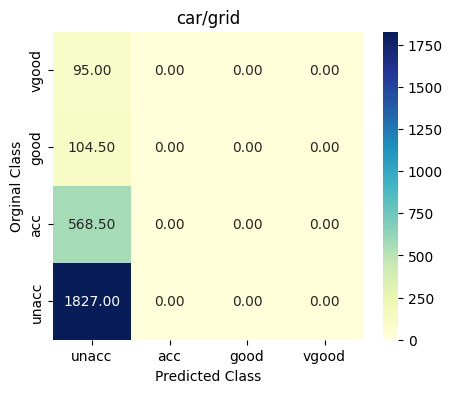

Dataset: seeds
Best model accuracy: 0.41; Parameters = seeds_70_60_30_poly


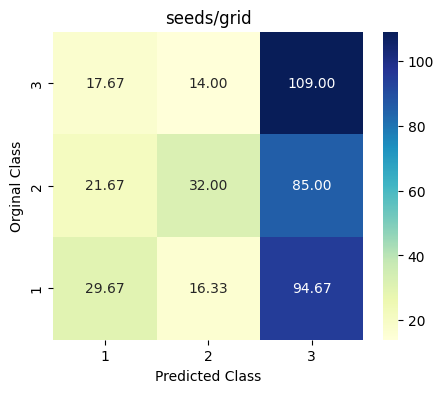

Error occured for parameters:
divorce_10_30_10_rbf
Error occured for parameters:
divorce_10_30_50_poly
Error occured for parameters:
divorce_10_30_70_linear
Error occured for parameters:
divorce_10_30_70_sigmoid
Error occured for parameters:
divorce_10_30_90_sigmoid
Error occured for parameters:
divorce_10_60_10_sigmoid
Error occured for parameters:
divorce_10_60_50_sigmoid
Error occured for parameters:
divorce_10_60_70_linear
Error occured for parameters:
divorce_10_60_70_sigmoid
Error occured for parameters:
divorce_10_60_90_linear
Error occured for parameters:
divorce_10_60_90_poly
Error occured for parameters:
divorce_10_60_90_rbf
Error occured for parameters:
divorce_10_90_50_poly
Error occured for parameters:
divorce_10_90_50_sigmoid
Error occured for parameters:
divorce_10_90_70_poly
Error occured for parameters:
divorce_10_90_70_sigmoid
Error occured for parameters:
divorce_10_90_90_linear
Error occured for parameters:
divorce_10_90_90_rbf
Error occured for parameters:
divorce_

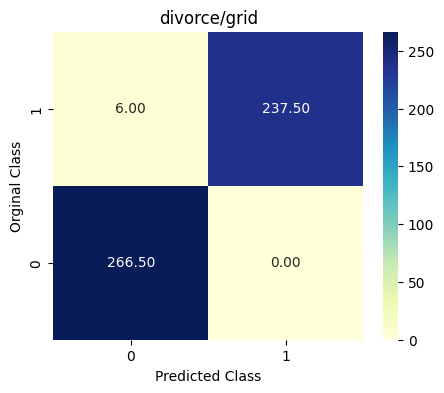

In [7]:
best_model = {}

for dset in DATASETS:
    grid_results, grid_aggregate = {}, {}
    best_model[dset] = {"acc": 0}
    for rows_prc in PERCENTAGE_GRID:
        for n_clfs in N_OF_CLASSIFIERS:
            for svm_prc in PERCENTAGE_GRID:
                for svm_kernel in SVM_KERNELS:
                    try:
                        module = ExperimentModule(
                            dataset_name=dset,
                            number_of_experiments=N_OF_EXPERIMENTS,
                            test_set_percentage=TEST_SET_PRC,
                            forest_parameters=[
                                0,
                                rows_prc,
                                n_clfs,
                                svm_prc,
                            ],
                            svm_parameters={"kernel": svm_kernel},
                        )
                        parameters = f"{dset}_{rows_prc}_{n_clfs}_{svm_prc}_{svm_kernel}"

                        results = module.run()
                        aggregated_acc, aggregated_matrix = aggregate_results(results)
                        results = format_results(results)

                        if best_model[dset]["acc"] < aggregated_acc:
                            best_model[dset]["acc"] = aggregated_acc
                            best_model[dset]["matrix"] = aggregated_matrix
                            best_model[dset]["name"] = parameters

                        grid_results[parameters] = results
                        grid_aggregate[parameters] = aggregated_acc, aggregated_matrix.tolist()
                    except:
                        print(f"Error occured for parameters:\n{parameters}")

    print(f"Dataset: {dset}")
    print(
        f"Best model accuracy: {best_model[dset]['acc']}; Parameters = {best_model[dset]['name']}"
    )
    plot_confusion_matrix(best_model[dset]["matrix"], get_labels(dset), f"{dset}/grid")

    save_results(grid_results, f"{dset}/grid_search")
    save_results_to_json(grid_aggregate, f"{dset}/grid_search")


# Randomized Search

Dataset: car
Best model accuracy: 0.71; Parameters = car_26_70_28_linear


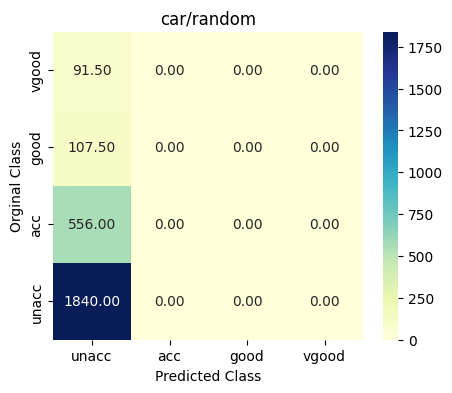

Dataset: seeds
Best model accuracy: 0.39; Parameters = seeds_81_48_28_rbf


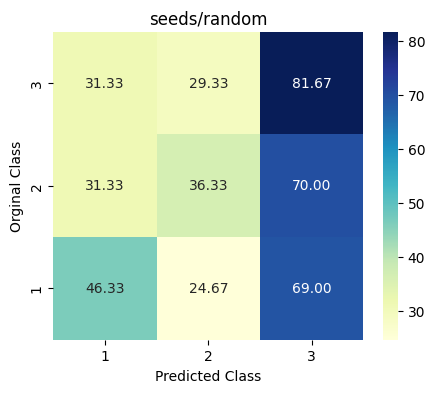

Dataset: divorce
Best model accuracy: 0.99; Parameters = divorce_31_80_49_sigmoid


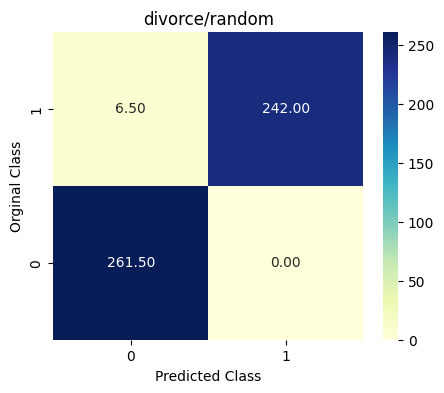

Dataset: musk
Best model accuracy: 0.69; Parameters = musk_89_60_95_linear


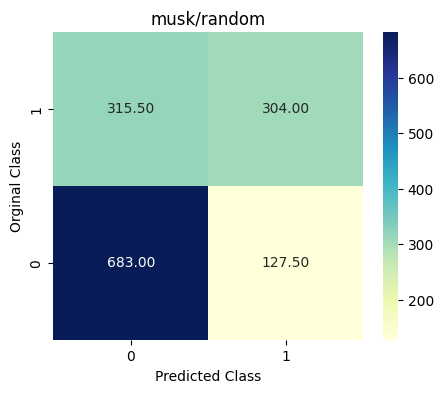

In [2]:
grid_results, grid_aggregate = {}, {}
best_model = {}

for dset in DATASETS:
    best_model[dset] = {"acc": 0}
    for _ in range(25):
        try:
            atributes_prc, rows_prc, svm_prc = np.random.randint(
                PERCENTAGE_RANGE[0], PERCENTAGE_RANGE[1], size=3
            )
            n_clfs = np.random.randint(N_OF_CLASSIFIERS_RANGE[0], N_OF_CLASSIFIERS_RANGE[1])
            svm_kernel = np.random.choice(SVM_KERNELS)

            module = ExperimentModule(
                dataset_name=dset,
                number_of_experiments=N_OF_EXPERIMENTS,
                test_set_percentage=TEST_SET_PRC,
                forest_parameters=[
                    atributes_prc,
                    rows_prc,
                    n_clfs,
                    svm_prc,
                ],
                svm_parameters={"kernel": svm_kernel},
            )

            parameters = (
                f"{dset}_{rows_prc}_{n_clfs}_{svm_prc}_{svm_kernel}"
            )

            results = module.run()
            aggregated_acc, aggregated_matrix = aggregate_results(results)
            results = format_results(results)

            if best_model[dset]["acc"] < aggregated_acc:
                best_model[dset]["acc"] = aggregated_acc
                best_model[dset]["matrix"] = aggregated_matrix
                best_model[dset]["name"] = parameters

            grid_results[parameters] = results
            grid_aggregate[parameters] = aggregated_acc, aggregated_matrix.tolist()

        except:
            print(f"Error occured for parameters:\n{parameters}")

    print(f"Dataset: {dset}")
    print(
        f"Best model accuracy: {best_model[dset]['acc']}; Parameters = {best_model[dset]['name']}"
    )
    plot_confusion_matrix(
        best_model[dset]["matrix"], get_labels(dset), f"{dset}/random"
    )

save_results(grid_results, "random_search")
save_results_to_json(grid_aggregate, "random_search")


# SVM Forest

Dataset: car
Best model accuracy: 0.71; Parameters = car_69_62_100_sigmoid


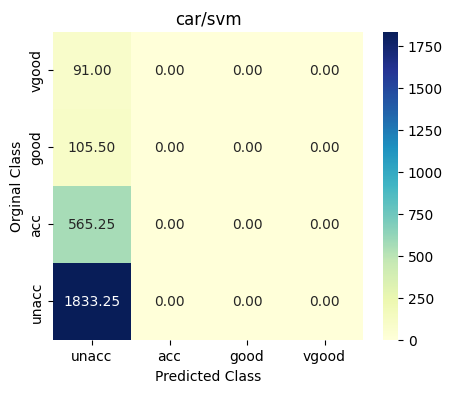

Dataset: seeds
Best model accuracy: 0.36; Parameters = seeds_63_40_100_linear


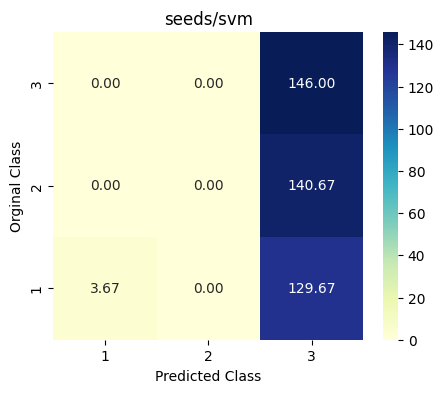

Dataset: divorce
Best model accuracy: 0.98; Parameters = divorce_97_96_100_rbf


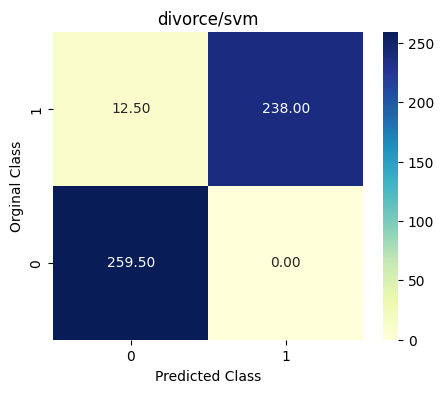

Dataset: musk
Best model accuracy: 0.69; Parameters = musk_65_79_100_linear


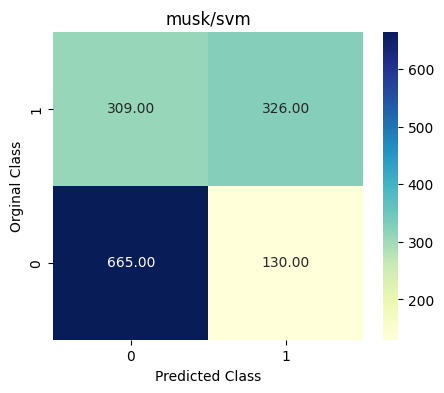

In [3]:
grid_results, grid_aggregate = {}, {}
best_model = {}

for dset in DATASETS:
    best_model[dset] = {"acc": 0}
    for _ in range(25):
        try:
            atributes_prc, rows_prc = np.random.randint(
                PERCENTAGE_RANGE[0], PERCENTAGE_RANGE[1], size=2
            )
            n_clfs = np.random.randint(
                N_OF_CLASSIFIERS_RANGE[0], N_OF_CLASSIFIERS_RANGE[1]
            )
            svm_kernel = np.random.choice(SVM_KERNELS)

            module = ExperimentModule(
                dataset_name=dset,
                number_of_experiments=N_OF_EXPERIMENTS,
                test_set_percentage=TEST_SET_PRC,
                forest_parameters=[
                    atributes_prc,
                    rows_prc,
                    n_clfs,
                    100,
                ],
                svm_parameters={"kernel": svm_kernel},
            )
            parameters = f"{dset}_{rows_prc}_{n_clfs}_100_{svm_kernel}"

            results = module.run()
            aggregated_acc, aggregated_matrix = aggregate_results(results)
            results = format_results(results)

            if best_model[dset]["acc"] < aggregated_acc:
                best_model[dset]["acc"] = aggregated_acc
                best_model[dset]["matrix"] = aggregated_matrix
                best_model[dset]["name"] = parameters

            grid_results[parameters] = results
            grid_aggregate[parameters] = aggregated_acc, aggregated_matrix.tolist()
        except:
            print(f"Error occured for parameters:\n{parameters}")

    print(f"Dataset: {dset}")
    print(
        f"Best model accuracy: {best_model[dset]['acc']}; Parameters = {best_model[dset]['name']}"
    )
    plot_confusion_matrix(best_model[dset]["matrix"], get_labels(dset), f"{dset}/svm")

save_results(grid_results, "svm_search")
save_results_to_json(grid_aggregate, "svm_search")


# ID3 Forest

Dataset: car
Best model accuracy: 0.71; Parameters = car_64_60_0_None


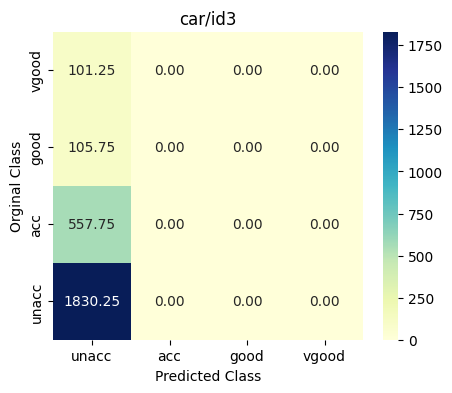

Dataset: seeds
Best model accuracy: 0.38; Parameters = seeds_91_72_0_None


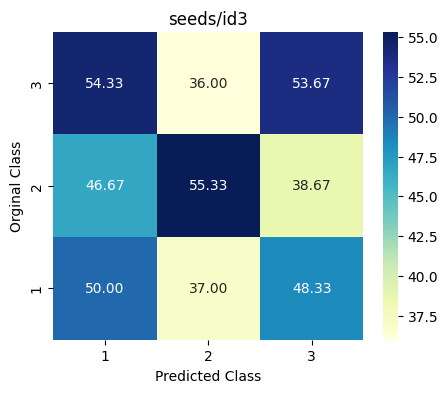

Dataset: divorce
Best model accuracy: 0.98; Parameters = divorce_65_50_0_None


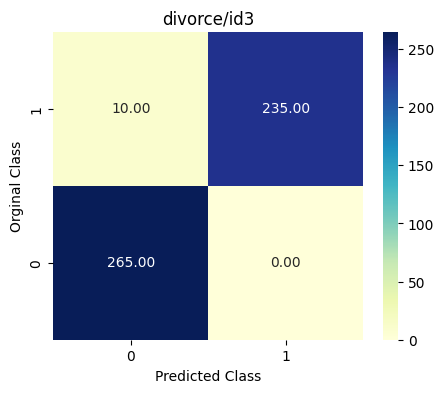

Dataset: musk
Best model accuracy: 0.71; Parameters = musk_94_75_0_None


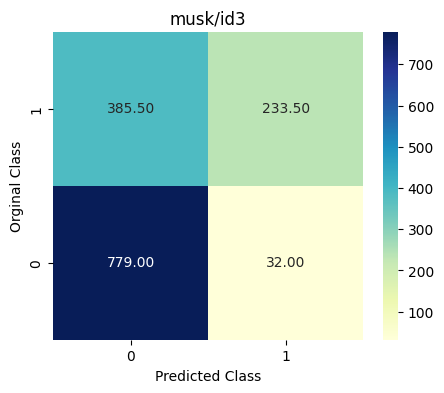

In [4]:
grid_results, grid_aggregate = {}, {}
best_model = {}

for dset in DATASETS:
    best_model[dset] = {"acc": 0}
    for _ in range(20):
        try:
            atributes_prc, rows_prc = np.random.randint(
                PERCENTAGE_RANGE[0], PERCENTAGE_RANGE[1], size=2
            )
            n_clfs = np.random.randint(
                N_OF_CLASSIFIERS_RANGE[0], N_OF_CLASSIFIERS_RANGE[1]
            )

            module = ExperimentModule(
                dataset_name=dset,
                number_of_experiments=N_OF_EXPERIMENTS,
                test_set_percentage=TEST_SET_PRC,
                forest_parameters=[
                    atributes_prc,
                    rows_prc,
                    n_clfs,
                    0,
                ],
                svm_parameters={"kernel": ""},
            )
            parameters = f"{dset}_{rows_prc}_{n_clfs}_0_None"

            results = module.run()
            aggregated_acc, aggregated_matrix = aggregate_results(results)
            results = format_results(results)

            if best_model[dset]["acc"] < aggregated_acc:
                best_model[dset]["acc"] = aggregated_acc
                best_model[dset]["matrix"] = aggregated_matrix
                best_model[dset]["name"] = parameters

            grid_results[parameters] = results
            grid_aggregate[parameters] = aggregated_acc, aggregated_matrix.tolist()
        except:
            print(f"Error occured for parameters:\n{parameters}")

    print(f"Dataset: {dset}")
    print(
        f"Best model accuracy: {best_model[dset]['acc']}; Parameters = {best_model[dset]['name']}"
    )
    plot_confusion_matrix(best_model[dset]["matrix"], get_labels(dset), f"{dset}/id3")

save_results(grid_results, "id3_search")
save_results_to_json(grid_aggregate, "id3_search")
